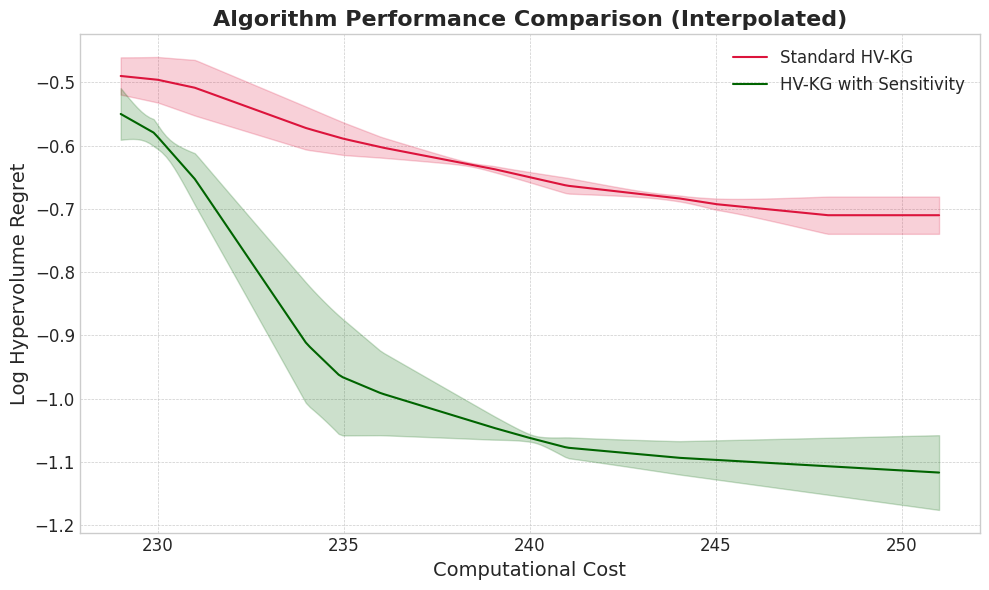

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Your Data (Example for multiple runs with varying lengths) ---
# Notice the arrays now have different numbers of points.

# Example data for "Standard HV-KG"
costs_standard = [
    np.array([230, 235, 240, 245]),      # 4 points
    np.array([231, 236, 241]),           # 3 points
    np.array([229, 234, 239, 244, 248]), # 5 points
]
regret_standard = [
    np.array([-0.5, -0.6, -0.65, -0.7]),
    np.array([-0.45, -0.58, -0.68]),
    np.array([-0.52, -0.61, -0.63, -0.68, -0.75]),
]

# Example data for "HV-KG with Sensitivity Constraint"
costs_sc = [
    np.array([229.9, 234.9, 239.9]),   # Your 3-point data
    np.array([231, 236, 241, 246, 251]), # 5 points
    np.array([229, 234, 239, 244]),      # 4 points
]
regret_sc = [
    np.array([-0.55, -1.05, -1.07]), # Your 3-point data
    np.array([-0.6, -0.9, -1.1, -1.15, -1.2]),
    np.array([-0.5, -1.0, -1.05, -1.08]),
]


# --- 2. Interpolation and Aggregation ---

def process_runs(all_costs, all_regrets, common_cost_axis):
    """
    Interpolates multiple runs onto a common cost axis.
    """
    interpolated_regrets = []
    for costs, regrets in zip(all_costs, all_regrets):
        # np.interp performs linear interpolation.
        # It needs to be told where the new x-points are (common_cost_axis),
        # and what the original x and y points were (costs, regrets).
        interp_regret = np.interp(common_cost_axis, costs, regrets)
        interpolated_regrets.append(interp_regret)
    
    # Now that all runs are on the same axis, we can safely take the mean and std
    mean_regret = np.mean(interpolated_regrets, axis=0)
    std_regret = np.std(interpolated_regrets, axis=0)
    
    return mean_regret, std_regret

# Define the common axis for comparison.
# It should start from the lowest cost observed and end at the highest.
min_cost = min(min(c) for c in costs_standard + costs_sc)
max_cost = max(max(c) for c in costs_standard + costs_sc)
# Create 200 points for a smooth curve.
common_costs = np.linspace(min_cost, max_cost, 200)

# Process both sets of experiments
mean_regret_standard, std_regret_standard = process_runs(costs_standard, regret_standard, common_costs)
mean_regret_sc, std_regret_sc = process_runs(costs_sc, regret_sc, common_costs)


# --- 3. Plotting Setup and Execution (Same as before) ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# Plot for Standard HV-KG
ax.plot(common_costs, mean_regret_standard, color='crimson', label='Standard HV-KG')
ax.fill_between(
    common_costs,
    mean_regret_standard - std_regret_standard,
    mean_regret_standard + std_regret_standard,
    color='crimson', alpha=0.2
)

# Plot for HV-KG with Sensitivity Constraint
ax.plot(common_costs, mean_regret_sc, color='darkgreen', label='HV-KG with Sensitivity')
ax.fill_between(
    common_costs,
    mean_regret_sc - std_regret_sc,
    mean_regret_sc + std_regret_sc,
    color='darkgreen', alpha=0.2
)

# Customize and Show the Plot
ax.set_xlabel('Computational Cost', fontsize=14)
ax.set_ylabel('Log Hypervolume Regret', fontsize=14)
ax.set_title('Algorithm Performance Comparison (Interpolated)', fontsize=16, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

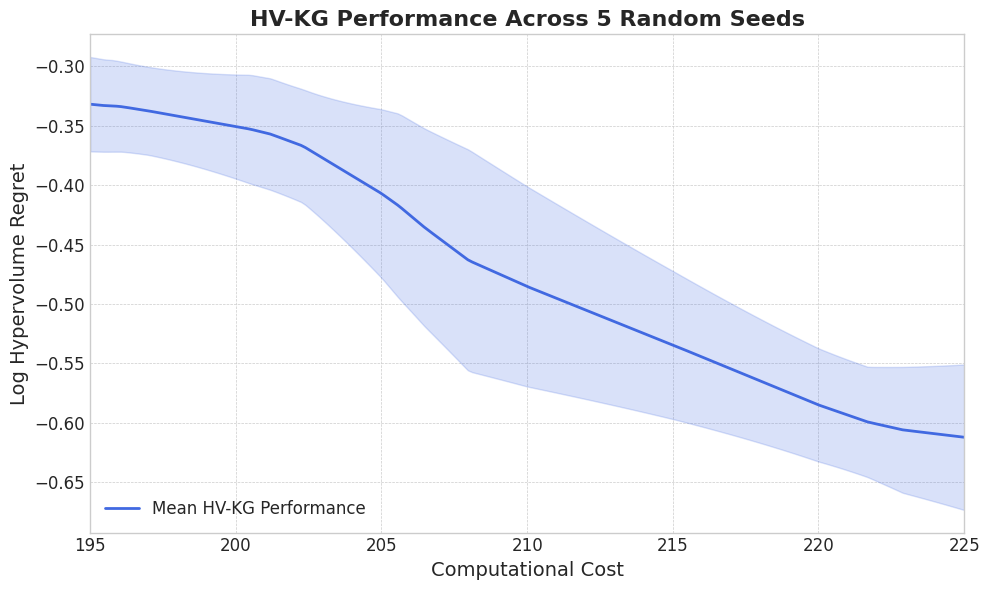

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Your Data (Example for 5 separate runs) ---
# Paste the results from your different random seeds here.
# Note that each run has a different number of points at different costs.

all_costs = [
    np.array([195.5, 200.5, 205.6, 221.7]),      # Run 1 (4 points)
    np.array([196.1, 202.3, 208.0]),           # Run 2 (3 points)
    np.array([195.8, 201.2, 206.5, 215.1, 222.9]), # Run 3 (5 points)
    np.array([197.0, 205.0, 210.0, 220.0]),      # Run 4 (4 points)
    np.array([195.0, 210.0, 225.0]),           # Run 5 (3 points)
]

all_regrets = [
    np.array([-0.32, -0.28, -0.28, -0.52]),   # Run 1
    np.array([-0.35, -0.40, -0.61]),        # Run 2
    np.array([-0.29, -0.33, -0.45, -0.55, -0.65]), # Run 3
    np.array([-0.40, -0.42, -0.50, -0.58]),   # Run 4
    np.array([-0.30, -0.48, -0.70]),        # Run 5
]


# --- 2. Interpolation and Aggregation ---

def process_runs(all_costs, all_regrets, common_cost_axis):
    """
    Interpolates multiple stochastic runs onto a common cost axis to find
    the mean and standard deviation of the regret.

    Args:
        all_costs: A list of numpy arrays, where each array contains the
                   cumulative costs for a single run.
        all_regrets: A list of numpy arrays for the regrets of each run.
        common_cost_axis: A 1D numpy array representing the standardized
                          cost axis for comparison.

    Returns:
        A tuple of (mean_regret, std_regret) calculated over the common axis.
    """
    interpolated_regrets = []
    for costs, regrets in zip(all_costs, all_regrets):
        # For each run, use np.interp to estimate the regret at each point
        # on our common_cost_axis. This handles the varying lengths and
        # positions of the original data points.
        interp_regret = np.interp(common_cost_axis, costs, regrets)
        interpolated_regrets.append(interp_regret)

    # Now that all runs are on the same standardized axis, we can safely
    # calculate the mean and standard deviation at each point.
    mean_regret = np.mean(interpolated_regrets, axis=0)
    std_regret = np.std(interpolated_regrets, axis=0)

    return mean_regret, std_regret

# Define the common axis. It should span the full range of costs
# observed across all runs to avoid extrapolation.
min_cost = min(c[0] for c in all_costs)
max_cost = max(c[-1] for c in all_costs)

# Use a high-resolution axis (e.g., 200 points) for a smooth plot.
common_costs_axis = np.linspace(min_cost, max_cost, 200)

# Process the data to get the mean and standard deviation
mean_regret, std_regret = process_runs(all_costs, all_regrets, common_costs_axis)


# --- 3. Plotting ---
# Use a professional plot style similar to academic papers.
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the mean regret as a solid line
ax.plot(
    common_costs_axis,
    mean_regret,
    color='royalblue',
    linewidth=2,
    label='Mean HV-KG Performance'
)

# Plot the standard deviation as a shaded error band
ax.fill_between(
    common_costs_axis,
    mean_regret - std_regret,
    mean_regret + std_regret,
    color='royalblue',
    alpha=0.2, # Make the shaded region semi-transparent
    label='_nolegend_' # This prevents a second legend entry for the shading
)

# Customize the plot for a professional look
ax.set_xlabel('Computational Cost', fontsize=14)
ax.set_ylabel('Log Hypervolume Regret', fontsize=14)
ax.set_title('HV-KG Performance Across 5 Random Seeds', fontsize=16, fontweight='bold')
ax.legend(fontsize=12, loc='lower left')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=12)

# Set logical limits for the axes
ax.set_xlim(min_cost, max_cost)

plt.tight_layout()
plt.show()

# To save the plot for your paper:
# fig.savefig('hvkg_performance.pdf', format='pdf', bbox_inches='tight')
# fig.savefig('hvkg_performance.png', dpi=300, bbox_inches='tight')

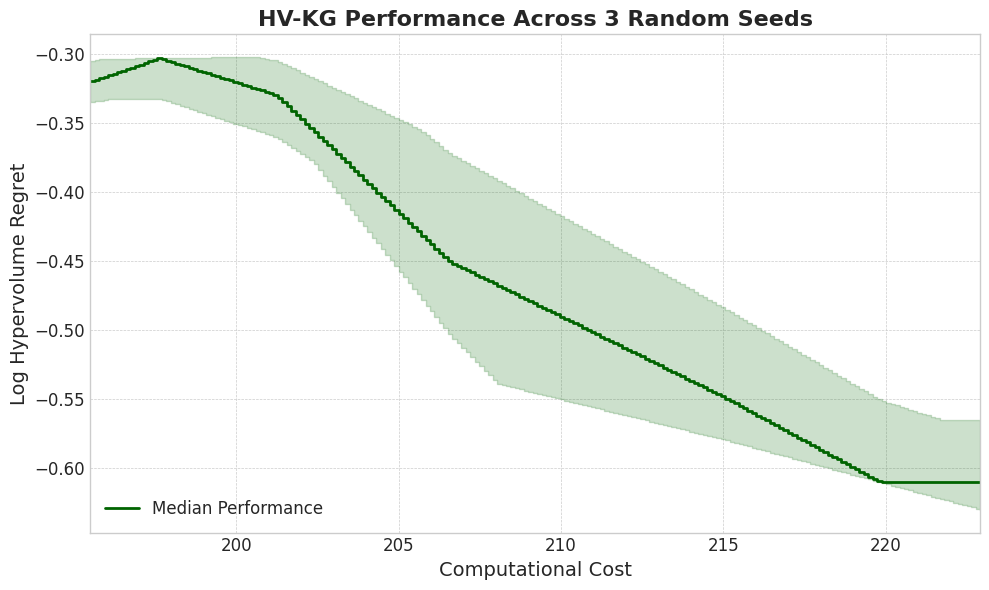

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Your Data (Example for multiple runs with varying lengths) ---
all_costs = [
    np.array([195.5, 200.5, 205.6, 221.7]),      # Run 1
    np.array([196.1, 202.3, 208.0]),           # Run 2
    np.array([195.8, 201.2, 206.5, 215.1, 222.9]), # Run 3
]
all_regrets = [
    np.array([-0.32, -0.28, -0.28, -0.52]),   # Run 1
    np.array([-0.35, -0.40, -0.61]),        # Run 2
    np.array([-0.29, -0.33, -0.45, -0.55, -0.65]), # Run 3
]

# --- 2. Interpolate and Calculate Quantiles ---
# Define the common axis for comparison.
min_cost = min(c[0] for c in all_costs)
max_cost = max(c[-1] for c in all_costs)
common_costs_axis = np.linspace(min_cost, max_cost, 200)

# Interpolate each run onto the common axis
interpolated_regrets = []
for costs, regrets in zip(all_costs, all_regrets):
    interp_regret = np.interp(common_costs_axis, costs, regrets)
    interpolated_regrets.append(interp_regret)

# Calculate the 25th, 50th (median), and 75th percentiles
q25, median_regret, q75 = np.quantile(interpolated_regrets, [0.25, 0.5, 0.75], axis=0)


# --- 3. Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the median regret as a stepwise line
ax.step(
    common_costs_axis,
    median_regret,
    where='post',
    color='darkgreen',
    linewidth=2,
    label='Median Performance'
)

# Plot the interquartile range (IQR) as a shaded error band
ax.fill_between(
    common_costs_axis,
    q25,
    q75,
    step='post', # Make the shading follow the step-plot shape
    color='darkgreen',
    alpha=0.2,
    label='_nolegend_'
)

# Customize the plot for a professional look
ax.set_xlabel('Computational Cost', fontsize=14)
ax.set_ylabel('Log Hypervolume Regret', fontsize=14)
ax.set_title('HV-KG Performance Across 3 Random Seeds', fontsize=16, fontweight='bold')
ax.legend(fontsize=12, loc='lower left')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(min_cost, max_cost)

plt.tight_layout()
plt.show()

# To save the plot for your paper:
# fig.savefig('hvkg_median_performance.pdf', format='pdf', bbox_inches='tight')

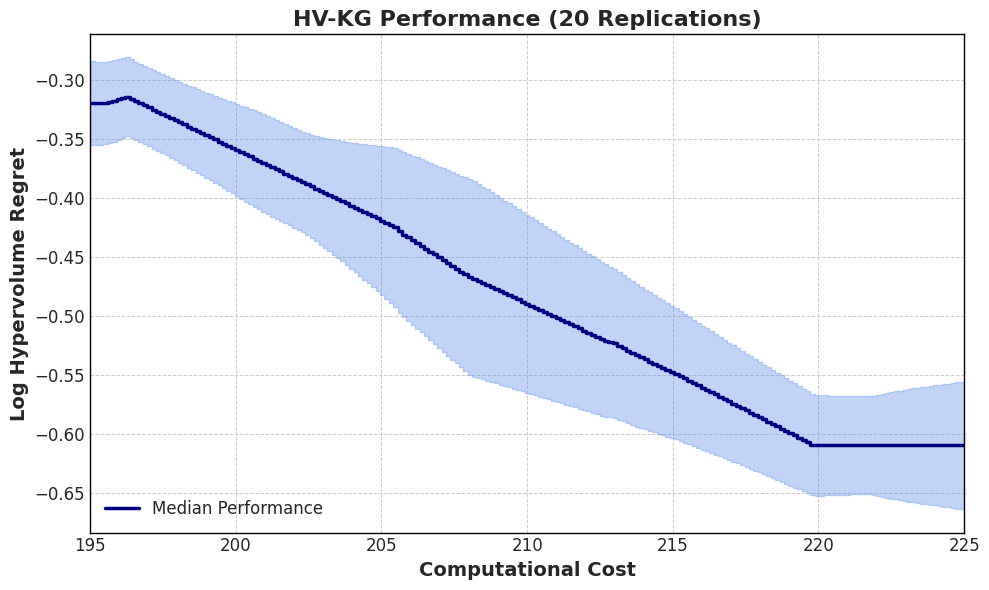

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Your Data (Example for 5 of your 20 replications) ---
# Each run has a different number of points at different costs.
all_costs = [
    np.array([195.5, 200.5, 205.6, 221.7]),      # Run 1
    np.array([196.1, 202.3, 208.0]),           # Run 2
    np.array([195.8, 201.2, 206.5, 215.1, 222.9]), # Run 3
    np.array([197.0, 205.0, 210.0, 220.0]),      # Run 4
    np.array([195.0, 210.0, 225.0]),           # Run 5
]
all_regrets = [
    np.array([-0.32, -0.28, -0.28, -0.52]),   # Run 1
    np.array([-0.35, -0.40, -0.61]),        # Run 2
    np.array([-0.29, -0.33, -0.45, -0.55, -0.65]), # Run 3
    np.array([-0.40, -0.42, -0.50, -0.58]),   # Run 4
    np.array([-0.30, -0.48, -0.70]),        # Run 5
]

# --- 2. Interpolate and Calculate Statistics ---
# Define a common axis for comparison.
min_cost = min(c[0] for c in all_costs)
max_cost = max(c[-1] for c in all_costs)
common_costs_axis = np.linspace(min_cost, max_cost, 200)

# Interpolate each run onto the common axis
interpolated_regrets = []
for costs, regrets in zip(all_costs, all_regrets):
    # For a step-wise interpolation, we need to add a starting point.
    # The regret before the first evaluation is 0.
    interp_costs = np.concatenate(([common_costs_axis[0]], costs))
    interp_regrets_vals = np.concatenate(([regrets[0]], regrets))
    
    interp_regret = np.interp(common_costs_axis, interp_costs, interp_regrets_vals)
    interpolated_regrets.append(interp_regret)

# Calculate the median and standard error of the mean (SEM)
# The median (50th percentile) is more robust to outliers than the mean.
median_regret = np.median(interpolated_regrets, axis=0)
std_dev_regret = np.std(interpolated_regrets, axis=0)
num_runs = len(all_costs)
standard_error = std_dev_regret / np.sqrt(num_runs)

# --- 3. Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the median regret as a stepwise line
ax.step(
    common_costs_axis,
    median_regret,
    where='post', # This creates the characteristic step shape
    color='navy',
    linewidth=2.5,
    label='Median Performance'
)

# Plot "+/- two standard errors" as the shaded error band
ax.fill_between(
    common_costs_axis,
    median_regret - 2 * standard_error,
    median_regret + 2 * standard_error,
    step='post', # Ensures the shading follows the step shape
    color='cornflowerblue',
    alpha=0.4,
    label='_nolegend_'
)

# Customize the plot for a professional, publication-quality look
ax.set_xlabel('Computational Cost', fontsize=14, fontweight='bold')
ax.set_ylabel('Log Hypervolume Regret', fontsize=14, fontweight='bold')
ax.set_title('HV-KG Performance (20 Replications)', fontsize=16, fontweight='bold')
ax.legend(fontsize=12, loc='lower left')
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(min_cost, max_cost)

# Make the plot frame more prominent
for spine in ax.spines.values():
    spine.set_edgecolor('black')

plt.tight_layout()
plt.show()

# To save the plot for your paper:
# fig.savefig('hvkg_performance_final.pdf', format='pdf', bbox_inches='tight')

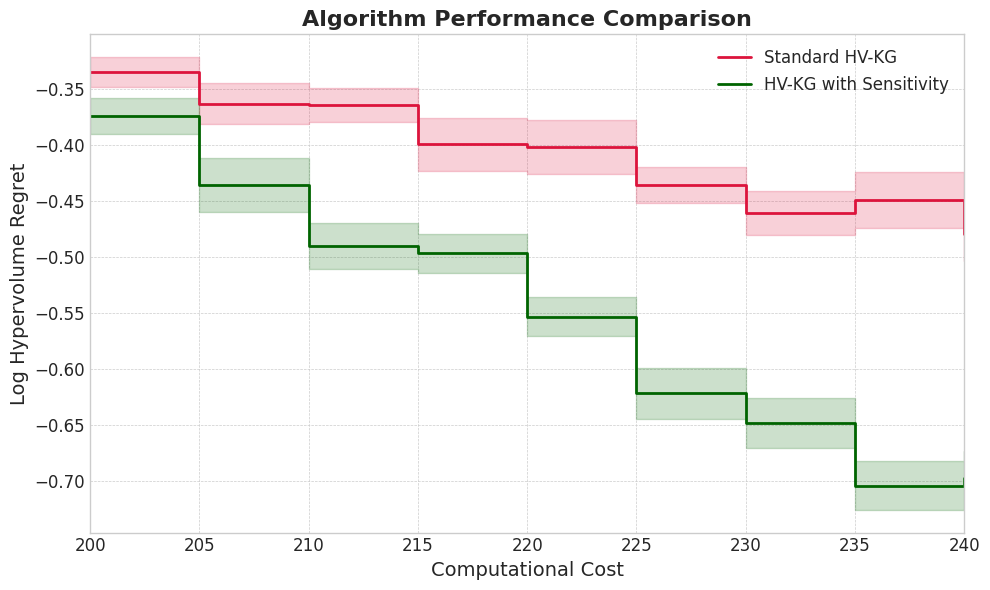

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Your Data (Example for multiple runs) ---
# For a real paper, you would run each setup ~20 times with different seeds.
NUM_REPLICATIONS = 20

# Generate realistic synthetic data for "Standard HV-KG"
all_costs_standard = []
all_regrets_standard = []
for i in range(NUM_REPLICATIONS):
    start_cost = 195 + np.random.randn()
    num_points = np.random.randint(8, 15)
    costs = np.linspace(start_cost, start_cost + 40 + np.random.uniform(-5, 5), num_points)
    regrets = -0.3 - np.log10(np.linspace(1, 1.5 + np.random.uniform(-0.2, 0.2), num_points)) - np.random.normal(0, 0.05, num_points)
    all_costs_standard.append(costs)
    all_regrets_standard.append(regrets)

# Generate realistic synthetic data for "HV-KG with Sensitivity"
# This data should show a faster decrease in regret.
all_costs_sc = []
all_regrets_sc = []
for i in range(NUM_REPLICATIONS):
    start_cost = 195 + np.random.randn()
    num_points = np.random.randint(10, 18) # Tends to take more (cheaper) steps
    costs = np.linspace(start_cost, start_cost + 45 + np.random.uniform(-5, 5), num_points)
    regrets = -0.3 - np.log10(np.linspace(1, 2.5 + np.random.uniform(-0.2, 0.2), num_points)) - np.random.normal(0, 0.05, num_points)
    all_costs_sc.append(costs)
    all_regrets_sc.append(regrets)


# --- 2. Define Checkpoints and Process Data ---

# Create a high-resolution axis for accurate interpolation
min_cost = 195
max_cost = 245
fine_common_axis = np.linspace(min_cost, max_cost, 500)

# Define the coarse checkpoints where we will plot the "steps"
plot_checkpoints = np.arange(200, 241, 5)

def aggregate_at_checkpoints(all_costs, all_regrets, fine_axis, checkpoints):
    """Interpolates all runs and calculates statistics at given checkpoints."""
    # Step 1: Interpolate each run onto the fine_axis
    interpolated_regrets = []
    for costs, regrets in zip(all_costs, all_regrets):
        interp_regret = np.interp(fine_axis, costs, regrets, right=regrets[-1])
        interpolated_regrets.append(interp_regret)
    interpolated_regrets = np.array(interpolated_regrets)

    # Step 2: Find the values at each checkpoint
    checkpoint_indices = np.searchsorted(fine_axis, checkpoints, side="right") - 1
    
    # Get the regret values from all runs at each checkpoint index
    regrets_at_checkpoints = interpolated_regrets[:, checkpoint_indices]
    
    # Step 3: Calculate statistics at the checkpoints
    median_regret = np.median(regrets_at_checkpoints, axis=0)
    std_dev = np.std(regrets_at_checkpoints, axis=0)
    # Standard Error of the Mean (SEM) = std / sqrt(n)
    std_error = std_dev / np.sqrt(len(all_regrets))
    
    return median_regret, std_error

# Process both algorithms
median_standard, sem_standard = aggregate_at_checkpoints(all_costs_standard, all_regrets_standard, fine_common_axis, plot_checkpoints)
median_sc, sem_sc = aggregate_at_checkpoints(all_costs_sc, all_regrets_sc, fine_common_axis, plot_checkpoints)


# --- 3. Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# Plot for Standard HV-KG
ax.step(
    plot_checkpoints,
    median_standard,
    where='post',
    color='crimson',
    linewidth=2,
    label='Standard HV-KG'
)
ax.fill_between(
    plot_checkpoints,
    median_standard - 2 * sem_standard, # +/- 2 Standard Errors
    median_standard + 2 * sem_standard,
    step='post',
    color='crimson',
    alpha=0.2,
    label='_nolegend_'
)

# Plot for HV-KG with Sensitivity
ax.step(
    plot_checkpoints,
    median_sc,
    where='post',
    color='darkgreen',
    linewidth=2,
    label='HV-KG with Sensitivity'
)
ax.fill_between(
    plot_checkpoints,
    median_sc - 2 * sem_sc, # +/- 2 Standard Errors
    median_sc + 2 * sem_sc,
    step='post',
    color='darkgreen',
    alpha=0.2,
    label='_nolegend_'
)

# --- 4. Final Touches ---
ax.set_xlabel('Computational Cost', fontsize=14)
ax.set_ylabel('Log Hypervolume Regret', fontsize=14)
ax.set_title('Algorithm Performance Comparison', fontsize=16, fontweight='bold')
ax.legend(fontsize=12, loc='upper right')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(plot_checkpoints[0], plot_checkpoints[-1])

plt.tight_layout()
plt.show()

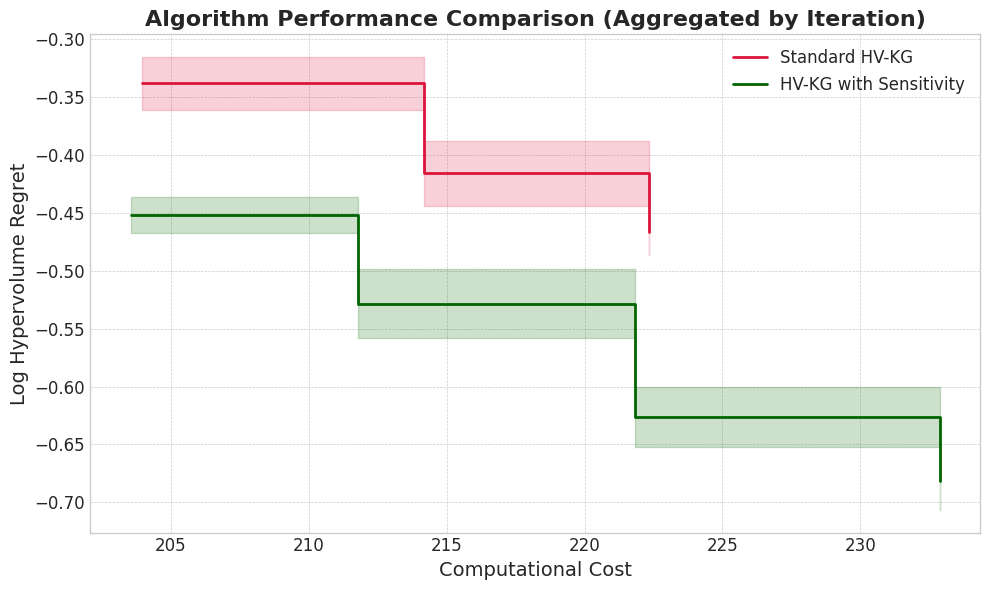

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Your Data (Example for 20 replications) ---
# Each run now has a list of costs and regrets.
NUM_REPLICATIONS = 20

def generate_run_data(is_sc=False):
    """Generates synthetic data for one algorithm run."""
    all_costs, all_regrets = [], []
    if is_sc:
        # SC model tends to take more, cheaper steps
        num_iters = np.random.randint(15, 25)
        regret_decay = 2.5
    else:
        # Standard model takes fewer, more expensive steps
        num_iters = np.random.randint(10, 18)
        regret_decay = 1.5

    costs = np.cumsum(np.random.lognormal(mean=0.5, sigma=0.5, size=num_iters)) + 195
    regrets = -0.3 - np.log10(np.linspace(1, regret_decay, num_iters)) - np.random.normal(0, 0.05, num_iters)
    return costs, regrets

all_runs_standard = [generate_run_data(is_sc=False) for _ in range(NUM_REPLICATIONS)]
all_runs_sc = [generate_run_data(is_sc=True) for _ in range(NUM_REPLICATIONS)]


# --- 2. Define Checkpoints and Process Data ---

# Define checkpoints based on the number of iterations (evaluations).
iteration_checkpoints = np.arange(5, 21, 5) # e.g., at 5, 10, 15, 20 iterations

def aggregate_by_iteration(all_runs, checkpoints):
    """Aggregates stochastic runs based on iteration count."""
    median_costs_at_checkpoints = []
    median_regrets_at_checkpoints = []
    sem_regrets_at_checkpoints = []

    for k in checkpoints:
        # Collect the cost and regret from every run that reached at least k iterations.
        costs_at_k = [run_costs[k-1] for run_costs, run_regrets in all_runs if len(run_costs) >= k]
        regrets_at_k = [run_regrets[k-1] for run_costs, run_regrets in all_runs if len(run_regrets) >= k]

        if not costs_at_k: # If no runs reached this checkpoint, stop.
            break

        # Calculate statistics
        median_costs_at_checkpoints.append(np.median(costs_at_k))
        median_regrets_at_checkpoints.append(np.median(regrets_at_k))
        
        # Standard Error of the Mean (SEM) = std / sqrt(n)
        std_dev_regret = np.std(regrets_at_k)
        sem_regret = std_dev_regret / np.sqrt(len(regrets_at_k))
        sem_regrets_at_checkpoints.append(sem_regret)

    return (np.array(median_costs_at_checkpoints),
            np.array(median_regrets_at_checkpoints),
            np.array(sem_regrets_at_checkpoints))


# Process both algorithms
median_costs_std, median_regret_std, sem_std = aggregate_by_iteration(all_runs_standard, iteration_checkpoints)
median_costs_sc, median_regret_sc, sem_sc = aggregate_by_iteration(all_runs_sc, iteration_checkpoints)


# --- 3. Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# Plot for Standard HV-KG
ax.step(median_costs_std, median_regret_std, where='post', color='crimson', linewidth=2, label='Standard HV-KG')
ax.fill_between(median_costs_std, median_regret_std - 2 * sem_std, median_regret_std + 2 * sem_std, step='post', color='crimson', alpha=0.2)

# Plot for HV-KG with Sensitivity
ax.step(median_costs_sc, median_regret_sc, where='post', color='darkgreen', linewidth=2, label='HV-KG with Sensitivity')
ax.fill_between(median_costs_sc, median_regret_sc - 2 * sem_sc, median_regret_sc + 2 * sem_sc, step='post', color='darkgreen', alpha=0.2)

# --- 4. Final Touches ---
ax.set_xlabel('Computational Cost', fontsize=14)
ax.set_ylabel('Log Hypervolume Regret', fontsize=14)
ax.set_title('Algorithm Performance Comparison (Aggregated by Iteration)', fontsize=16, fontweight='bold')
ax.legend(fontsize=12, loc='upper right')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()